In [116]:
import pandas as pd
import numpy as np
from datetime import date 
from datetime import timedelta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [117]:
df_covid_county =  pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
print(df_covid_county)

              date      county       state     fips  cases  deaths
0       2020-01-21   Snohomish  Washington  53061.0      1       0
1       2020-01-22   Snohomish  Washington  53061.0      1       0
2       2020-01-23   Snohomish  Washington  53061.0      1       0
3       2020-01-24        Cook    Illinois  17031.0      1       0
4       2020-01-24   Snohomish  Washington  53061.0      1       0
...            ...         ...         ...      ...    ...     ...
382762  2020-07-29  Sweetwater     Wyoming  56037.0    234       2
382763  2020-07-29       Teton     Wyoming  56039.0    318       1
382764  2020-07-29       Uinta     Wyoming  56041.0    245       1
382765  2020-07-29    Washakie     Wyoming  56043.0     44       5
382766  2020-07-29      Weston     Wyoming  56045.0      5       0

[382767 rows x 6 columns]


In [118]:
print(df_covid_county.isnull().sum())

date         0
county       0
state        0
fips      3845
cases        0
deaths       0
dtype: int64


In [119]:
df_covid_county['fips'].fillna(0,inplace=True)

In [120]:
print(df_covid_county.isnull().sum())

date      0
county    0
state     0
fips      0
cases     0
deaths    0
dtype: int64


2020-07-29 00:00:00


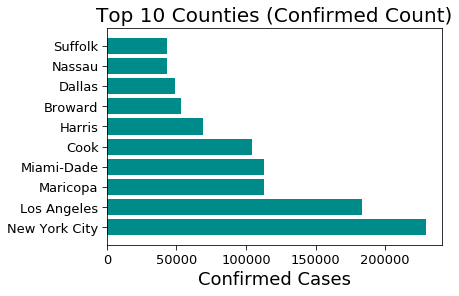

In [128]:
df_covid_county['date'] = pd.to_datetime(df_covid_county['date'])  
today = pd.Timestamp('today').normalize()
yesterday = today - timedelta(days = 1) 
print(yesterday)
mask = (df_covid_county['date'] == yesterday)
df = df_covid_county.loc[mask]

confirmed_cases= df.nlargest(10,'cases')
plt.barh(confirmed_cases['county'],confirmed_cases['cases'],color="darkcyan")
plt.xlabel("Confirmed Cases",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.title("Top 10 Counties (Confirmed Count)",fontsize=20)

plt.show()

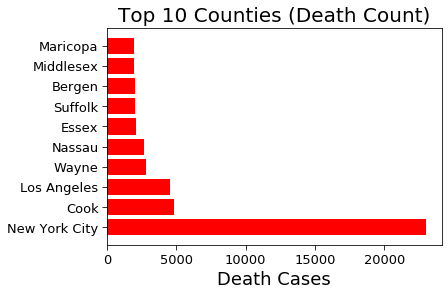

In [129]:
death_cases= df.nlargest(10,'deaths')
plt.barh(death_cases['county'],death_cases['deaths'],color="Red")
plt.xlabel("Death Cases",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.title("Top 10 Counties (Death Count)",fontsize=20)

plt.show()

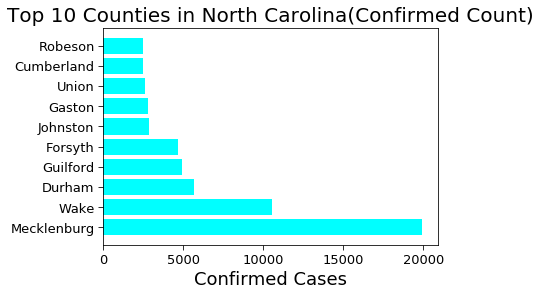

In [130]:
maskOne = (df['state'] == "North Carolina")
df = df.loc[maskOne]

confirmed_cases= df.nlargest(10,'cases')
plt.barh(confirmed_cases['county'],confirmed_cases['cases'],color="cyan")
plt.xlabel("Confirmed Cases",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.title("Top 10 Counties in North Carolina(Confirmed Count)",fontsize=20)

plt.show()

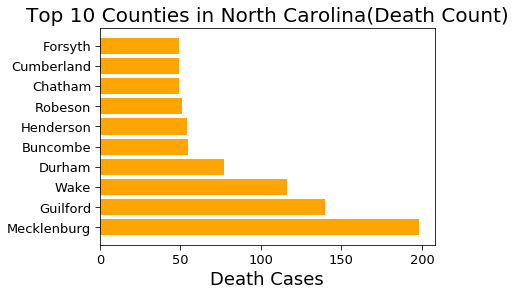

In [131]:
maskOne = (df['state'] == "North Carolina")
df = df.loc[maskOne]

confirmed_cases= df.nlargest(10,'deaths')
plt.barh(confirmed_cases['county'],confirmed_cases['deaths'],color="orange")
plt.xlabel("Death Cases",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.title("Top 10 Counties in North Carolina(Death Count)",fontsize=20)

plt.show()

In [225]:
maskState = (df_covid_county['state'] == "North Carolina")
maskCounty = (df_covid_county['county'] == "Mecklenburg")
df_state = df_covid_county.loc[maskState]
df_county = df_state.loc[maskCounty]

# /* Getting day-day values of covid cases*/

df_county['deaths_count'] = df_county.deaths.diff()
df_county['case_count'] = df_county.cases.diff()

df_county['case_count'].fillna(0,inplace=True)
df_county['deaths_count'].fillna(0,inplace=True)
print(df_county.isnull().sum())


date            0
county          0
state           0
fips            0
cases           0
deaths          0
deaths_count    0
case_count      0
dtype: int64


/Users/priyareddy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/priyareddy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


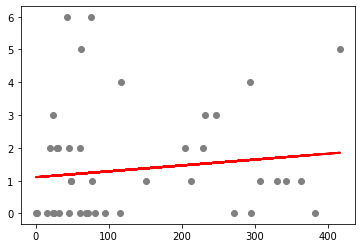

In [226]:
X = df_county['case_count'].values.reshape(-1,1)
y = df_county['deaths_count'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()  

# print(regressor.intercept_)
# #For retrieving the slope:
# print(regressor.coef_)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

dftest = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1 = dftest.head(25)

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)

plt.show()

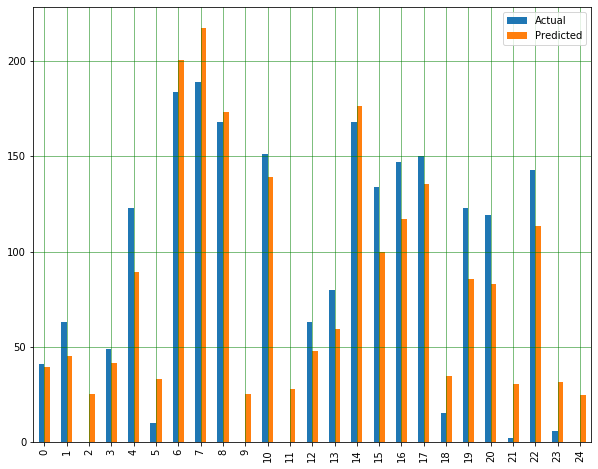

In [134]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [148]:
maskState = (df_covid_county['state'] == "North Carolina")
df_state = df_covid_county.loc[maskState]
df_state.sort_values('county')

df_state_sorted = df_state.sort_values(['county', "date"])
print(df_state_sorted.head(20))

            date    county           state     fips  cases  deaths
9041  2020-03-23  Alamance  North Carolina  37001.0      3       0
10349 2020-03-24  Alamance  North Carolina  37001.0      3       0
11785 2020-03-25  Alamance  North Carolina  37001.0      3       0
13388 2020-03-26  Alamance  North Carolina  37001.0      4       0
15122 2020-03-27  Alamance  North Carolina  37001.0      5       0
16953 2020-03-28  Alamance  North Carolina  37001.0      5       0
18879 2020-03-29  Alamance  North Carolina  37001.0      6       0
20918 2020-03-30  Alamance  North Carolina  37001.0      7       0
23042 2020-03-31  Alamance  North Carolina  37001.0      7       0
25236 2020-04-01  Alamance  North Carolina  37001.0      7       0
27497 2020-04-02  Alamance  North Carolina  37001.0     13       0
29821 2020-04-03  Alamance  North Carolina  37001.0     14       0
32207 2020-04-04  Alamance  North Carolina  37001.0     16       0
34638 2020-04-05  Alamance  North Carolina  37001.0     18    

In [209]:
df_covid_state =  pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
# df_covid_state=  pd.get_dummies(df_covid_state["state"])
print(df_covid_state)

            date          state  fips  cases  deaths
0     2020-01-21     Washington    53      1       0
1     2020-01-22     Washington    53      1       0
2     2020-01-23     Washington    53      1       0
3     2020-01-24       Illinois    17      1       0
4     2020-01-24     Washington    53      1       0
...          ...            ...   ...    ...     ...
8259  2020-07-30       Virginia    51  88904    2141
8260  2020-07-30     Washington    53  58100    1653
8261  2020-07-30  West Virginia    54   6422     115
8262  2020-07-30      Wisconsin    55  56111     928
8263  2020-07-30        Wyoming    56   2686      26

[8264 rows x 5 columns]


In [229]:
maskState = (df_covid_state['state'] == "North Carolina")
df_state = df_covid_state.loc[maskState]

df_state['deaths_count'] = df_state.deaths.diff()
df_state['case_count'] = df_state.cases.diff()

df_state['case_count'].fillna(0,inplace=True)
df_state['deaths_count'].fillna(0,inplace=True)
print(df_county.isnull().sum())


date            0
county          0
state           0
fips            0
cases           0
deaths          0
deaths_count    0
case_count      0
dtype: int64


/Users/priyareddy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/priyareddy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/priyareddy/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

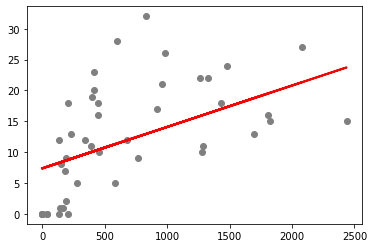

In [231]:
# df_state['date'] = pd.to_datetime(df_state['date'])
    
# df_state['date'] = int(df_state['date'].strftime('%Y%m%d'))

X = df_state['case_count'].values.reshape(-1,1)
y = df_state['deaths_count'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()  

# print(regressor.intercept_)
# #For retrieving the slope:
# print(regressor.coef_)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

dftest = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1 = dftest.head(7)

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)

plt.show()

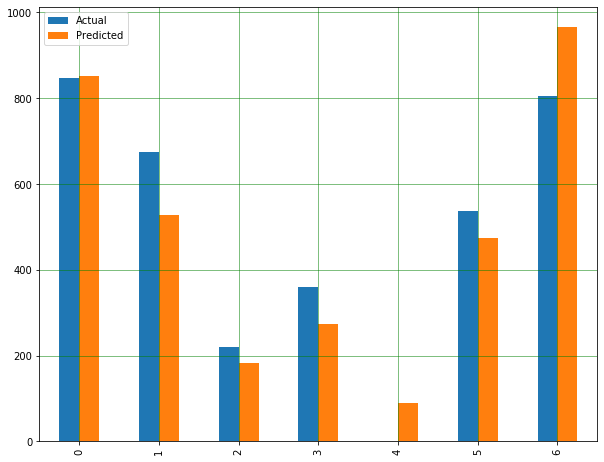

In [154]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()